# TESTS ABOUT A SINGLE MEAN

#### 1) ztests
- 1.1) Normal population with known standard deviation
- 1.2) Large Sample Test
- 1.3) z tests using in build function

#### 2) t tests
- 2.1) Small sample test in a normal population
- 2.2) t test using in build function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# 1) z TESTS

## 1.1) NORMAL POPULATION WITH KNOWN STANDARD DEVIATION

Although the assumption that the value of s is known is rarely met in practice, this
case provides a good starting point because of the ease with which general procedures and their properties can be developed

- Test : Z Test
- Test Statistics : z = (sample mean - proposed mean)/((population standard deviation / root of dample size)
$$z = \frac{x_0- \mu_o}{\sigma/\sqrt(n)} $$


In [2]:
# QUESTION
# Created below is a data with standard deviation 1.5

data = np.random.normal(128,1.5,10000)

# i) Plot density function of the data and identify the distribution.
# ii) Select a sample of 9 from the data and using its mean test the following hypothesis. 

#    H_0 := Population mean = 130 v/s H_a:= Population mean > 130 ( Right Tailed Test)
#    Significance level = 0.01

In [3]:
# i) For distribution let us convert it into data frame and use 
df = pd.DataFrame(data,columns=['Value'])

<AxesSubplot:ylabel='Density'>

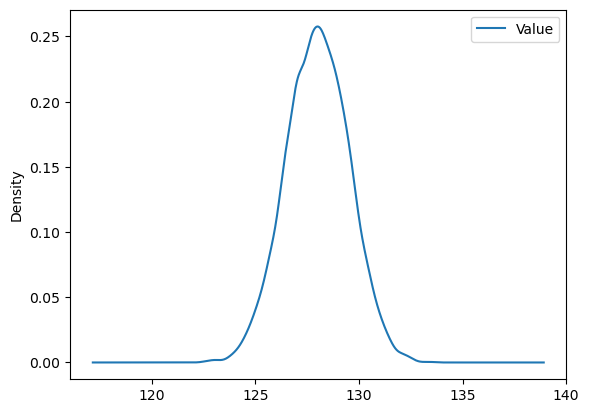

In [4]:
df.plot.kde()

In [5]:
#Create a sample of size
sample = np.random.choice(data, size=9)

In [6]:
#Calculate sample mean
sample_mean = sample.mean()

128.13648256413455

In [7]:
# Create test statistic
z = (sample_mean-130)/(1.5/np.sqrt(9))

In [8]:
# Calculate critical value
# use norm.ppt form scipy.stats
critical_value = st.norm.ppf(1-0.01)      # 1-0.01 because right tailed test 

In [9]:
if z>critical_value:
    print("Reject H_0")
else:
    print("We cant reject H_0")

We cant reject H_0


Conclusion
- No evidence for H_a, So no evidence for mean greater than 130

------------

## 1.2) LARGE SAMPLE TEST ANY POPULATION

For any population and for large sample we  can use z test. This is because of central limit theorem

- Test : z test
- Test Statistic : 
$$z = \frac{x_0- \mu_o}{s/\sqrt(n)} $$

- $x_0 =$  sample mean
- $\mu_0 =$  Proposed mean
- $s = $ Sample standard deviation

In [10]:
data = np.random.random(size =10000)

In [11]:
# Question 
# Select a sample of size 160 from above data and check the claim that the mean of the above data is not equal to 0.80
# Use significant leve of 0.05

In [12]:
# Answer 

Null Hypothesis $H_0 : \mu = 0.80$ 

Alternate Hypothesis$H_0 : \mu \neq 0.80$

Rejection Region : $ z < -z_{\alpha} $ OR $z > z_{\alpha}$

So $\mu_0 = 0.80$

In [13]:
#Sample
sample = np.random.choice(data, size=160)

# Sample mean
x_0 = sample.mean()

# Sample standard deviation
s = sample.std()

In [14]:
# Test statistics
z = (x_0 - 0.80)/((s/np.sqrt(160)))

In [15]:
# Critical Value 
critical_value = st.norm.ppf(1-0.05/2)

In [16]:
if  z<= -critical_value or  z >= critical_value:
    print("Reject H_0")
else:
    print("We cant reject H_0")

Reject H_0


 Conclusion
- Reject H_0, So accept H_a
- Evidence for mean not equal to 0.80

--------------------

## 1.3) z Test Using In-Build Functions

- from statsmodels.stats.weightstats import ztest

- This check $H0 : Mean = \mu_0$ V/S $H_a: Mean \neq \mu_0$

- Significance level used in this test is 0.05

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

In [63]:
# QUESTION 

Suppose the IQ in a certain population is normally distributed with a mean of μ = 100 and standard deviation of σ = 15. A new drug is introduced into the population.A researcher wants to know if a new drug affects IQ levels, so he recruits 45 patients to try it and records their IQ levels.

IQ levels for this 45 patients are 88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
105, 109, 109, 109, 110, 112, 112, 113, 114, 115,89, 92, 96, 94, 95, 98, 98, 100, 99, 99,
105, 109, 109, 108, 100, 112, 112, 113, 114, 115,89,99,96,90,112.

In [ ]:
# ANSWER

$H_0: \mu = 100$ V/S $H_a: \mu \neq 100$

In [54]:
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115,89, 92, 96, 94, 95, 98, 98, 100, 99, 99, 105, 109, 109, 108, 100, 112, 112, 113, 114, 115,89,99,96,90,112]

In [64]:
import statsmodels as sm
z,p = sm.stats.weightstats.ztest(data,value=100)

In [60]:
p

0.1101266701438426

In [62]:
if p<= 0.05:
    print("Reject H_0")
else:
    print("We Can't Reject H_0")

We Can't Reject H_0


Conclusion

we do not have sufficient evidence to reject the null hypothesis. In other words, the new drug does not significantly affect IQ level.

-----------------
---------------

# 2) t TESTS

## 2.1) SMALL SAMPLE TEST IN NORMAL POPULATION

Test: t Test
Test Statistic: 
 $$t = \frac{x_0- \mu_o}{s/\sqrt(n)} $$

- $x_0 =$  sample mean
- $\mu_0 =$  Proposed mean
- $s = $ Sample standard deviation

In [17]:
data = np.random.normal(128,1.5,10000)

In [18]:
# Question 
# By taking a sample of 20, check population mean of above data is less than 110.
# ignificance level 0.1

In [19]:
# ANSWER

Null Hypothesis $H_0 : \mu =110$ 

Alternate Hypothesis$H_0 : \mu < 110$

$\mu_0 = 110$

Rejection Region :$ t \leq - t_{\alpha,n-1}$

In [20]:
# Sample 
sample = np.random.choice(data, size=20)

In [21]:
sample_mean = sample.mean()
sample_std = sample.std()

In [22]:
# Test statistic 
t = (sample_mean-110)/(sample_std/np.sqrt(20))

In [23]:
# Critical value -t_{alpha,n-1}
critical_t = -(st.t.ppf(0.1, 19))

In [24]:
if t<= critical_t:
    print("Reject H_0")
else:
    print("We Can't Reject H_0")

We Can't Reject H_0


- No evidence for alernate hypothersis.
- So no evidence for Mean less than 110

-------------------

## One sample t test using in build function

In build one sample t test from scipy stats

- import scipy.stats as st
- scipy.stats.ttest_1samp 

- Inbuild significance level in this test is 0.05 
- So if p value less than 0.05 we reject null hypothesis

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [30]:
# Example

import scipy.stats as st 

data = np.random.normal(128,1.5,10000)

sample = np.random.choice(data, size=110)

t,p = st.ttest_1samp(a=sample,popmean=127)    # We are checking H_0 : Mean of sample = 127 V/S H_a : Mean of sample not equal to 127

In [31]:
p

2.1773890667046802e-07

Conclusion
- Extremely small p value says that the we reject the null hypothesis
- So we accept the alternate hypothesis that the mean of sample differ from 127

QUESTION 

Create a data for school height and create a data for class height. Check Whether mean of school height is differ from mean of class height 

In [36]:
#ANSWER
School_height = np.random.normal(158,1.5,1000)
Class_height = np.random.normal(156,2,60)

In [37]:
t,p = st.ttest_1samp(School_height,popmean=Class_height.mean()) # H_0 = Mean of School_height = Mean of Class_height

In [38]:
p

5.530183823343602e-206

In [46]:
if p<= 0.05:
    print("Reject H_0")
else:
    print("We Can't Reject H_0")

Reject H_0


Conclusion

- Very low p value suggest that we reject the null hpothesis
- So there is a significance difference between mean values of School_height and Class_height

In [41]:
# Let us do with some other random variable

School_height = st.poisson.rvs(loc=20,mu=35,size= 150) # loc = left minimum and mu = mean
Class_height = st.poisson.rvs(loc=25,mu=33,size= 50)

In [44]:
t,p = st.ttest_1samp(School_height, popmean=Class_height.mean())

In [45]:
p

8.3004454170252e-07

In [47]:
if p<=0.05:
    print("Reject H_0")
else:
    print("We Can't Reject H_0")

Reject H_0


Conclusion

- Very low p value suggest that we reject the null hpothesis
- So there is a significance difference between mean values of School_height and Class_height